# TDT4173: Machine Learning and Case-Based Reasoning - Assignment 1
### Author: Vittorio Triassi

For the purpose of the following assignment, we will be using *numpy* to better manipulate our datasets and *matplotlib* to show our results.

## Task 2 - Logistic Regression

In [1]:
# Import of the libraries that will be used
import numpy as np
import matplotlib.pyplot as plt

**1. Load the data in *cl_train_1.csv* and *cl_test_1.csv* and use your logistic regression implementation to train on the data in the training set. Is the data linearly separable? Explain your reasoning. Additionally, show a plot of the cross-entropy error for both the training and test set over 1000 iterations of training. What learning rate $\eta$ and initial parameters $w$ did you select? Is your model generalising well?** *Keep in mind that you may have to test several different learning rates to get a good classification. It may be helpful to plot the decision boundary to get a visual representation of the fit. This will allow you to see how well you are doing.*

First of all we need to load and manipulate a bit our csv files in order to have the right representation of our dataset

In [2]:
x_1, x_2, y = np.genfromtxt('dataset/classification/cl_train_1.csv', delimiter=',', usecols=(0,1,2), unpack=True)
x_1_test, x_2_test, y_test = np.genfromtxt('dataset/classification/cl_test_1.csv', delimiter=',', usecols=(0,1,2), unpack=True)

X0 = np.ones(y.shape[0])
X = np.column_stack((X0, x_1, x_2))

X0_test = np.ones(y_test.shape[0])
X_test = np.column_stack((X0_test, x_1_test, x_2_test))

By plotting our training examples we can get a deeper insight about the shape of the data and its distribution in the space. It is quite evident that the two classes (positive and negative) are *linearly separable* because we might fit a line exactly in the middle between them without using a polynomial of higher degree.

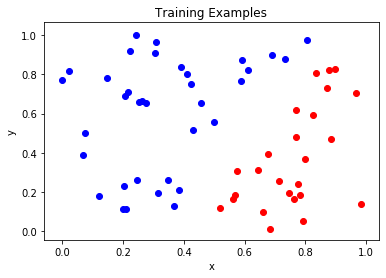

In [3]:
for i in range(len(y)):
    # Positive examples
    if y[i]:
        plt.scatter(x_1[i], x_2[i], color='blue')
    # Negative examples
    else:
        plt.scatter(x_1[i], x_2[i], color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Examples')
plt.show()

To carry out the Logistic Regression task, we need to define the **sigmoid** function and the **crossEntropy** function.

The sigmoid function or also called logistic function, is defined as follows:

\begin{align}
    \sigma(z) = \frac{1}{1+e^{-z}}
\end{align}
where $z = h(x) = w^Tx$


In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

While the cross entropy error is computed as:

\begin{align}
    E_{ce}(w) = -\frac{1}{N}\sum_{i=1}^{N}(y_i \ln \sigma(z)+(1-y_i)\ln(1-\sigma(z)))
\end{align}

In [5]:
def crossEntropy(x, y, w):
    return (-1/y.shape[0])*np.sum(y*np.log(sigmoid(np.dot(w.T,x.T)))+(1-y)*np.log(1-sigmoid(np.dot(w.T,x.T))))

After that, we can take care of the core function of our task, that is going to perform the update rule for the gradient descent and will let us to come up with a set of weights. The update rule is the following:

\begin{align}
    w(k+1)\leftarrow w(k) - \eta \sum_{i=1}^{N}(\sigma(z)-y_i)x_i\\
    \leftarrow w(k) - \eta \sum_{i=1}^{N}(\sigma(w(k)^T x_i)-y_i)x_i
\end{align}

In [6]:
def logisticRegression(X, y, learningRate, numberOfIterations):
    
    trainError = []
    testError = []
    
    # Initialization of the weights to zero 
    # (we might have set them also to random small values though)
    w = np.zeros(X.shape[1])
    
    for i in range(numberOfIterations):
        # Update rule for Gradient Descent
        w -= learningRate * np.dot(sigmoid(np.dot(w.T, X.T)) - y, X)
        
        # We compute and store the cross entropy values for both training
        # and testing data for the first 1000 iterations
        if i < 1000:
            trainError.append(crossEntropy(X, y, w))
            testError.append(crossEntropy(X_test, y_test, w))
    
    return w, trainError, testError

Now, by running the *Logistic Regression* we obtain the weights and the cross entropy errors

In [7]:
w, trainError, testError = logisticRegression(X, y, 0.01, 10000)

print("Set of weights computed: " + str(w))

Set of weights computed: [  9.82175532 -27.72899443  14.31815394]


We are going to plot on the following graph the two cross entropy errors for the first 1000 iterations in order to understand how our model behaves when dealing with unseen data.

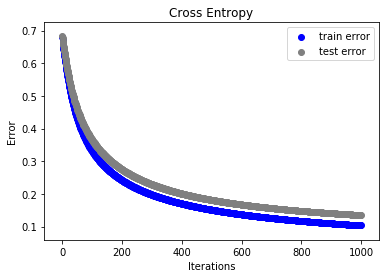

In [8]:
numberOfIterations = np.array(range(0, 1000))
plt.scatter(numberOfIterations, trainError, color='blue', linewidth='1', label='train error')
plt.scatter(numberOfIterations, testError, color='gray', linewidth='1', label='test error')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Cross Entropy')
plt.legend()
plt.show()

To better show that our classes are linearly separable, we compute the *decision boundary*. The result is the line shown below. To calculate the boundary we do the following:

Suppose that $x = (x_1, x_2)$ and the parameters are defined by $w = (w_0, w_1, w_2)$, we have:

\begin{align}
    x_2 = -\frac{w_1}{w_2}x_1-\frac{w_0}{w_2}
\end{align}

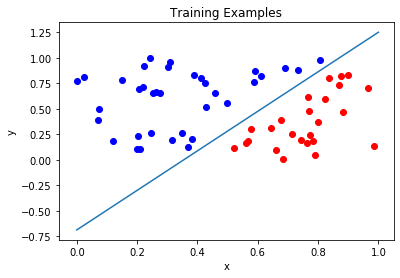

In [9]:
for i in range(len(y)):
    # Positive examples
    if y[i]:
        plt.scatter(x_1[i], x_2[i], color='blue')
    # Negative examples
    else:
        plt.scatter(x_1[i], x_2[i], color='red')
        
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Examples')

x1 = np.array(range(0, 2))
x2 = -(w[1]/w[2])*x1 - (w[0]/w[2])
plt.plot(x1, x2)

plt.show()

**2. Load the data in *cl_train_2.csv* and *cl_test_2.csv* and use your logistic regression implementation to train on the data in the training set. Is the data linearly separable? Explain your reasoning. Plot the *decision boundary* as explained in the previous task as well as the data points in the training and test set. Discuss what can be done for logistic regression to correctly classify the dataset. Make the necessary changes to your implementation and show the new decision boundary in your report.**

Load the data and manipulate the csv files

In [10]:
x_1_cl, x_2_cl, y_cl = np.genfromtxt('dataset/classification/cl_train_2.csv', delimiter=',', usecols=(0,1,2), unpack=True)
x_1_cl_test, x_2_cl_test, y_cl_test = np.genfromtxt('dataset/classification/cl_test_2.csv', delimiter=',', usecols=(0,1,2), unpack=True)

X0_cl = np.ones(y_cl.shape[0])
X_cl = np.column_stack((X0_cl, x_1_cl, x_2_cl))

X0_cl_test = np.ones(y_cl_test.shape[0])
X_cl_test = np.column_stack((X0_cl_test, x_1_cl_test, x_2_cl_test))

Run *Logistic Regression* previously defined setting the *learning rate* and the number of *iterations*

In [11]:
w_, trainError, testError = logisticRegression(X_cl, y_cl, 0.01, 10000)

print("Set of weights computed: " + str(w_))

Set of weights computed: [ 0.16110039  0.15938682 -0.45557345]


Plotting the training and testing examples and computing the decision boundary, it turns out that the two classes are **not** linearly separable.

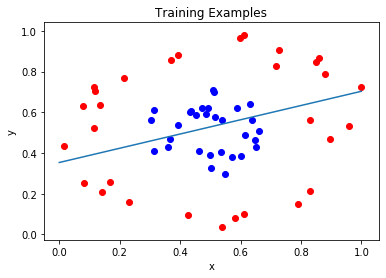

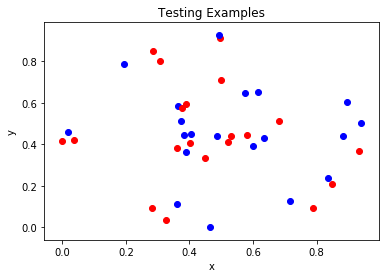

In [12]:
# Plotting the training examples
for i in range(len(y_cl)):
    # Positive examples
    if y_cl[i]:
        plt.scatter(x_1_cl[i], x_2_cl[i], color='blue')
    # Negative examples
    else:
        plt.scatter(x_1_cl[i], x_2_cl[i], color='red')
        
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Examples')

x1_ = np.array(range(0, 2))
x2_ = -(w_[1]/w_[2])*x1_ - (w_[0]/w_[2])
plt.plot(x1_, x2_)

plt.show()

# Plotting the testing examples
for i in range(len(y_cl_test)):
    # Positive examples
    if y_cl[i]:
        plt.scatter(x_1_cl_test[i], x_2_cl_test[i], color='blue')
    # Negative examples
    else:
        plt.scatter(x_1_cl_test[i], x_2_cl_test[i], color='red')
        
plt.xlabel('x')
plt.ylabel('y')
plt.title('Testing Examples')
plt.show()

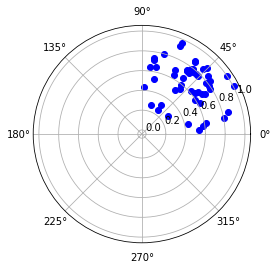

In [13]:
# Conversion from cartesian to polar coordinates

r = []
theta = []

for i in range(len(y_cl)):
    
    r.append(np.sqrt(x_1_cl[i]**2 + x_2_cl[i]**2))
    theta.append(np.arctan2(x_2_cl[i], x_1_cl[i]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.scatter(theta, r, color='blue')
 

plt.show()